In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt

data_path = Path('/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC')
training_path = data_path / 'training'

def load_arc_task(filename):
    """Load an ARC task from a JSON file."""
    with open(filename, 'r') as file:
        task = json.load(file)
    return task

def pad_array(array, target_size=(40, 40)):
    """Pad the input array to the target size with zeros."""
    padded_array = np.zeros(target_size, dtype=int)
    height, width = array.shape
    padded_array[:height, :width] = array
    return padded_array

# Load the first 15 tasks from the training folder
tasks = []
for task_file in sorted(training_path.glob('*.json'))[:15]:
    task = load_arc_task(task_file)
    tasks.append(task)

# Pad each array in each task to 40x40 size and store them in NumPy arrays
X_train, Y_train, X_test, Y_test = [], [], [], []
for task in tasks:
    for example in task['train']:
        X_train.append(pad_array(np.array(example['input']), target_size=(30,30)))
        Y_train.append(pad_array(np.array(example['output']), target_size=(30,30)))

    for example in task['test']:
        X_test.append(pad_array(np.array(example['input']), target_size=(30,30)))
        Y_test.append(pad_array(np.array(example['output']), target_size=(30,30)))

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)




In [ ]:
X_train.shape

(48, 30, 30)

In [ ]:
Y_train.shape

(48, 30, 30)

In [ ]:
X_test.shape

(15, 30, 30)

In [ ]:
Y_test.shape

(15, 30, 30)

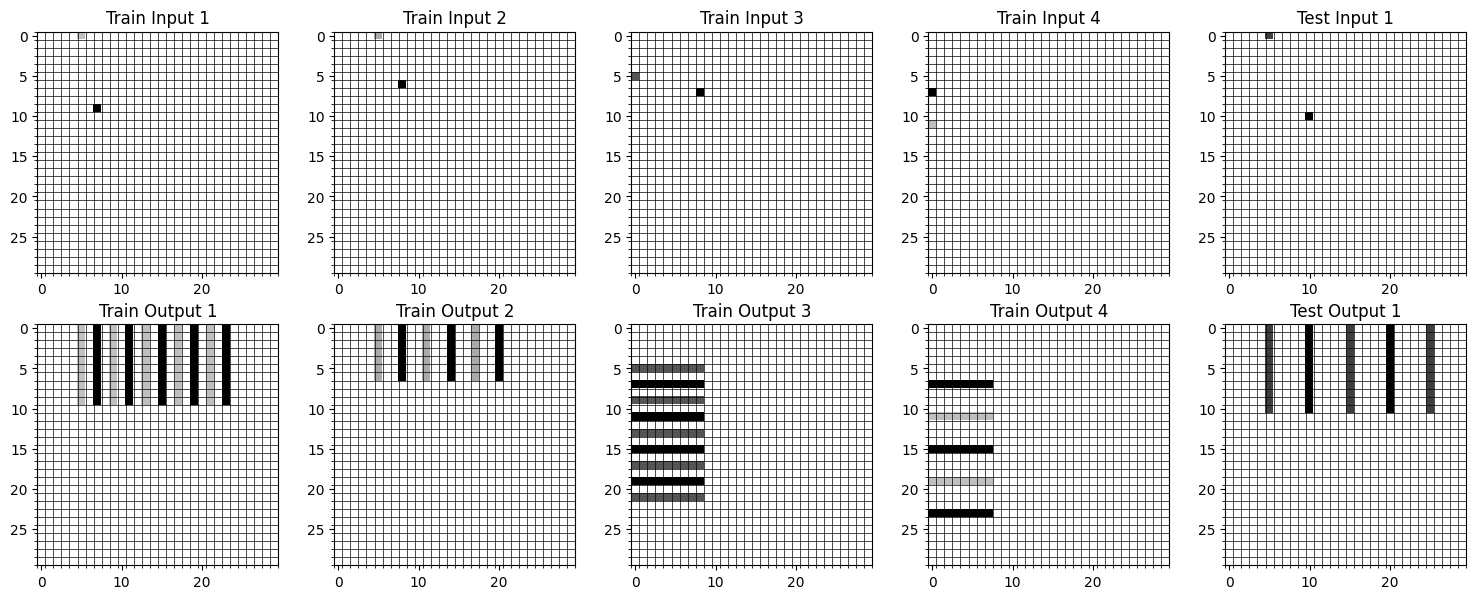

In [ ]:
# Visualize one of the tasks after padding
task_index = 12  # Choose the index of the task you want to visualize
task_to_visualize = tasks[task_index]

# Plot the input and output arrays in 30x30
num_train = len(task_to_visualize['train'])
num_test = len(task_to_visualize['test'])

fig, axs = plt.subplots(2, num_train + num_test, figsize=(3 * (num_train + num_test), 6))
for i, data in enumerate(task_to_visualize['train']):
    axs[0, i].imshow(data['input'], cmap='binary')
    axs[1, i].imshow(data['output'], cmap='binary')
    axs[0, i].set_title(f'Train Input {i+1}')
    axs[1, i].set_title(f'Train Output {i+1}')
    axs[0, i].set_xticks(np.arange(-0.5, 30, 1), minor=True)
    axs[0, i].set_yticks(np.arange(-0.5, 30, 1), minor=True)
    axs[0, i].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    axs[1, i].set_xticks(np.arange(-0.5, 30, 1), minor=True)
    axs[1, i].set_yticks(np.arange(-0.5, 30, 1), minor=True)
    axs[1, i].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
for i, data in enumerate(task_to_visualize['test']):
    axs[0, num_train + i].imshow(data['input'], cmap='binary')
    axs[1, num_train + i].imshow(data['output'], cmap='binary')
    axs[0, num_train + i].set_title(f'Test Input {i+1}')
    axs[1, num_train + i].set_title(f'Test Output {i+1}')
    axs[0, num_train + i].set_xticks(np.arange(-0.5, 30, 1), minor=True)
    axs[0, num_train + i].set_yticks(np.arange(-0.5, 30, 1), minor=True)
    axs[0, num_train + i].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    axs[1, num_train + i].set_xticks(np.arange(-0.5, 30, 1), minor=True)
    axs[1, num_train + i].set_yticks(np.arange(-0.5, 30, 1), minor=True)
    axs[1, num_train + i].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import colors
# Define color mapping
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

def plot_task(task):
    """Visualize input-output pairs from a task."""
    num_train = len(task['train'])
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_train + num_test, figsize=(3 * (num_train + num_test), 6))
    for i, data in enumerate(task['train']):
        axs[0, i].imshow(data['input'], cmap=cmap, norm=norm)
        axs[1, i].imshow(data['output'], cmap=cmap, norm=norm)
        axs[0, i].title.set_text(f'Train Input {i+1}')
        axs[1, i].title.set_text(f'Train Output {i+1}')
    for i, data in enumerate(task['test']):
        axs[0, num_train + i].imshow(data['input'], cmap=cmap, norm=norm)
        axs[1, num_train + i].imshow(data['output'], cmap=cmap, norm=norm)
        axs[0, num_train + i].title.set_text(f'Test Input {i+1}')
        axs[1, num_train + i].title.set_text(f'Test Output {i+1}')
    plt.tight_layout()
    plt.show()

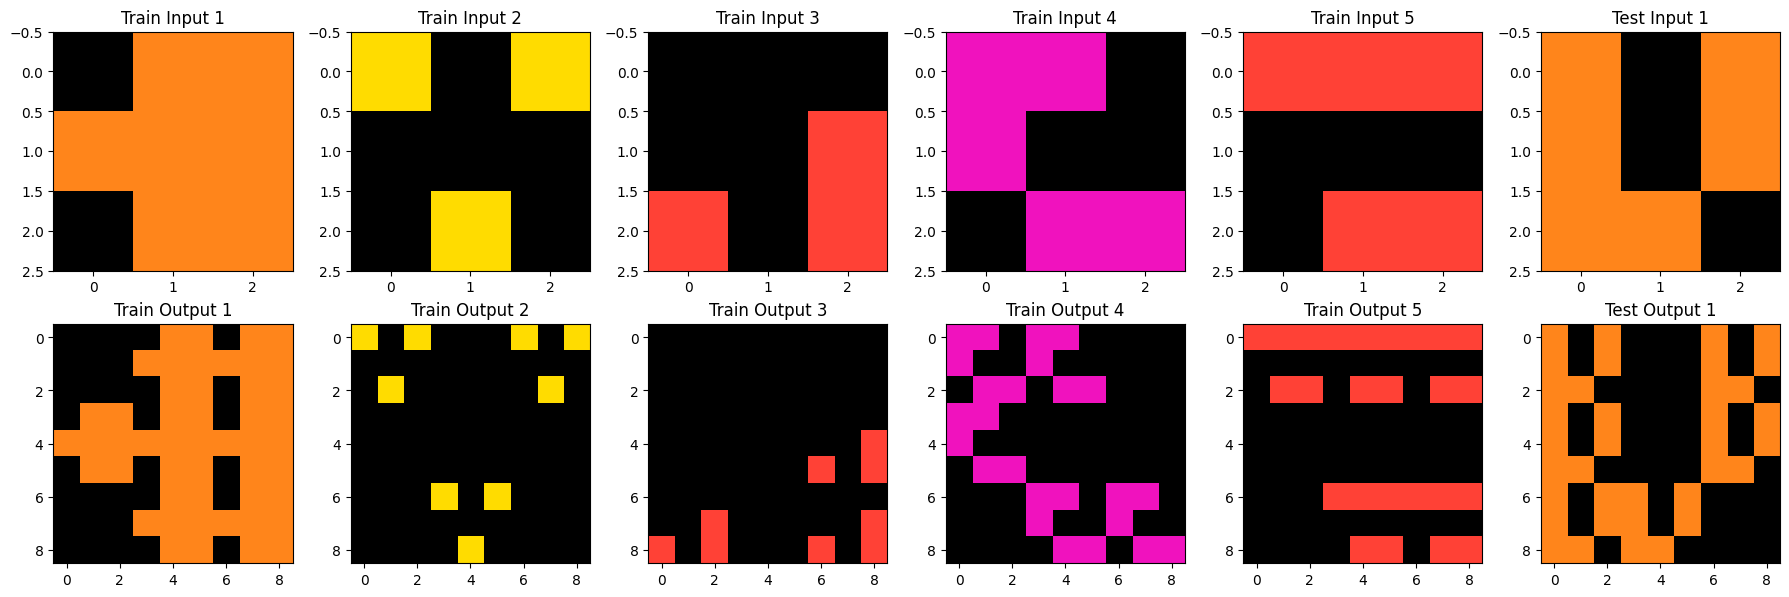

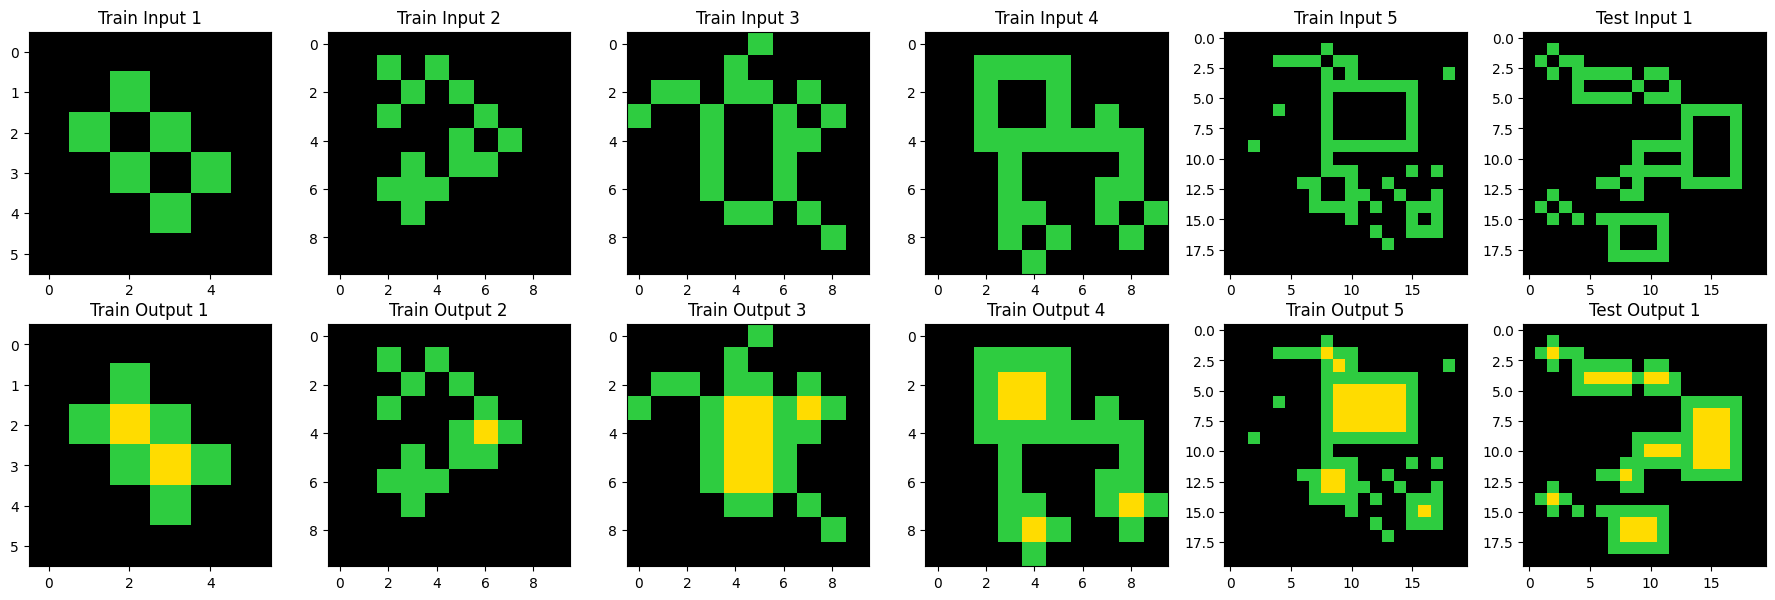

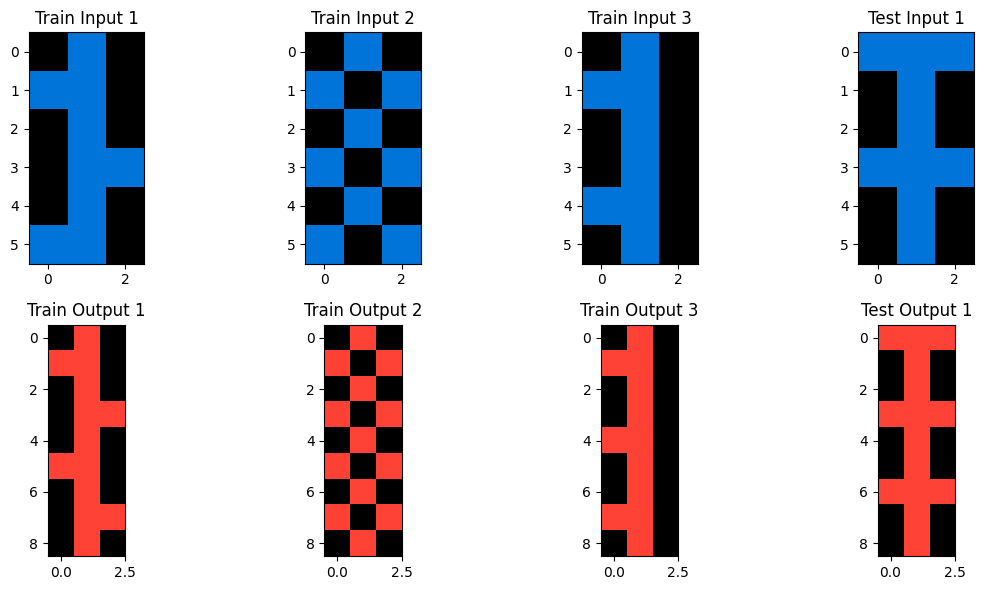

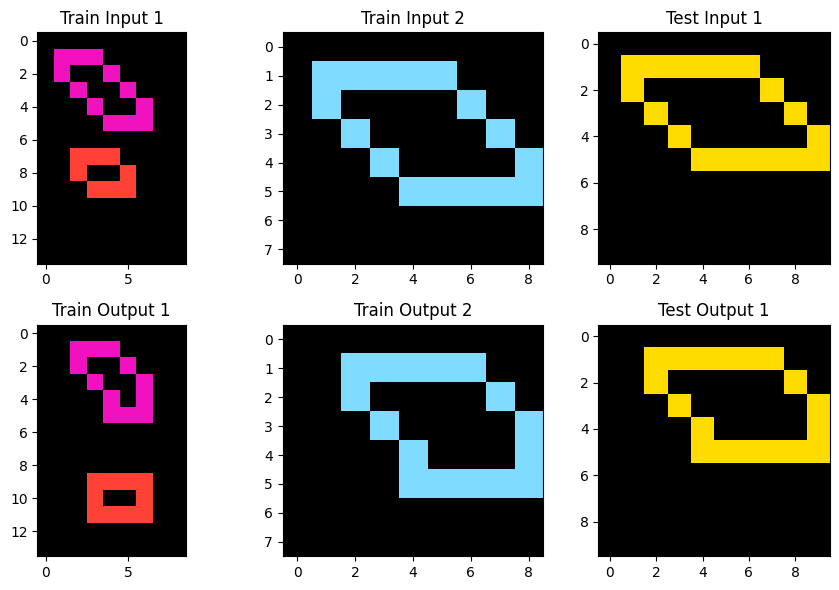

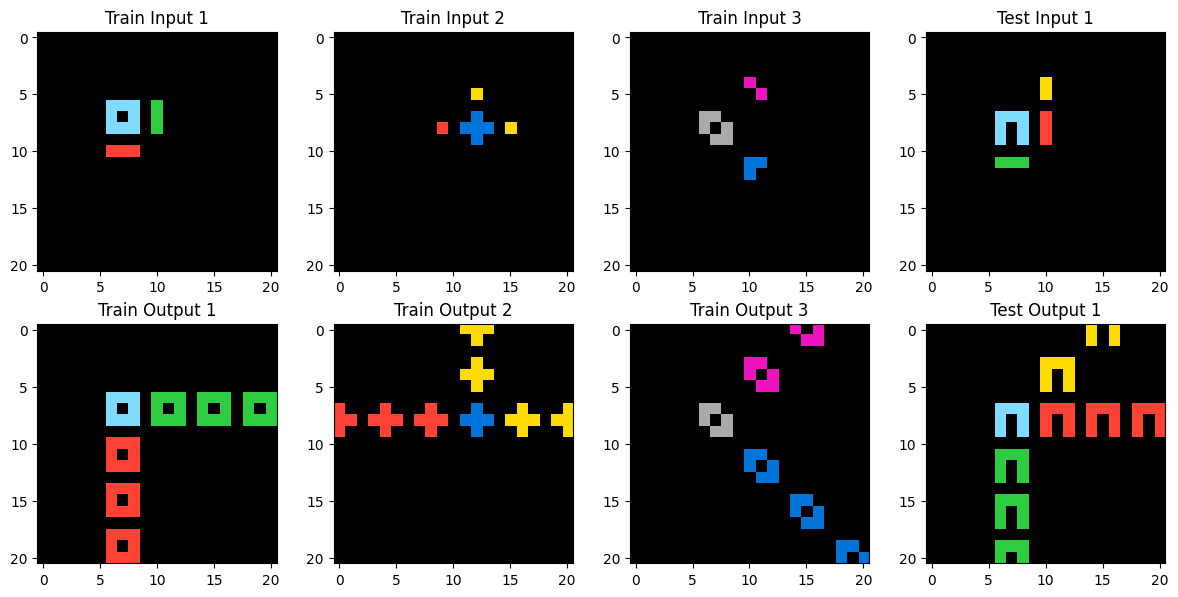

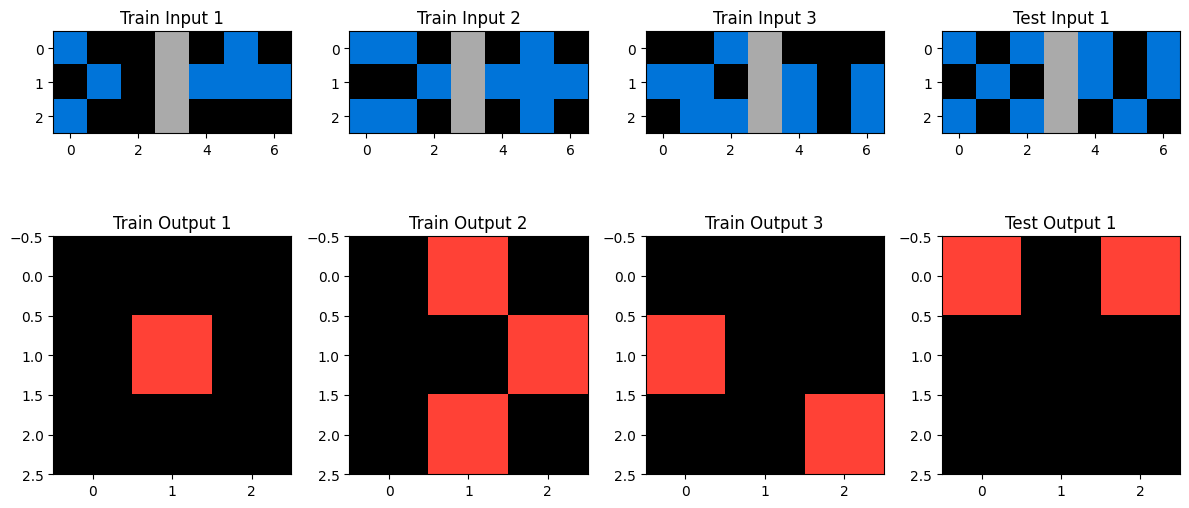

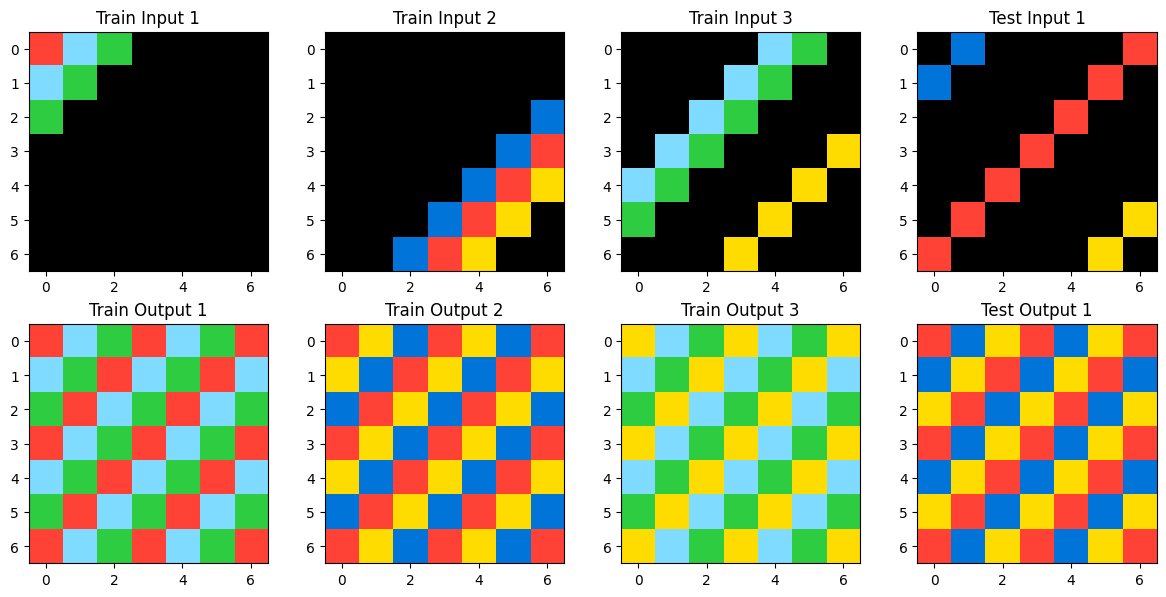

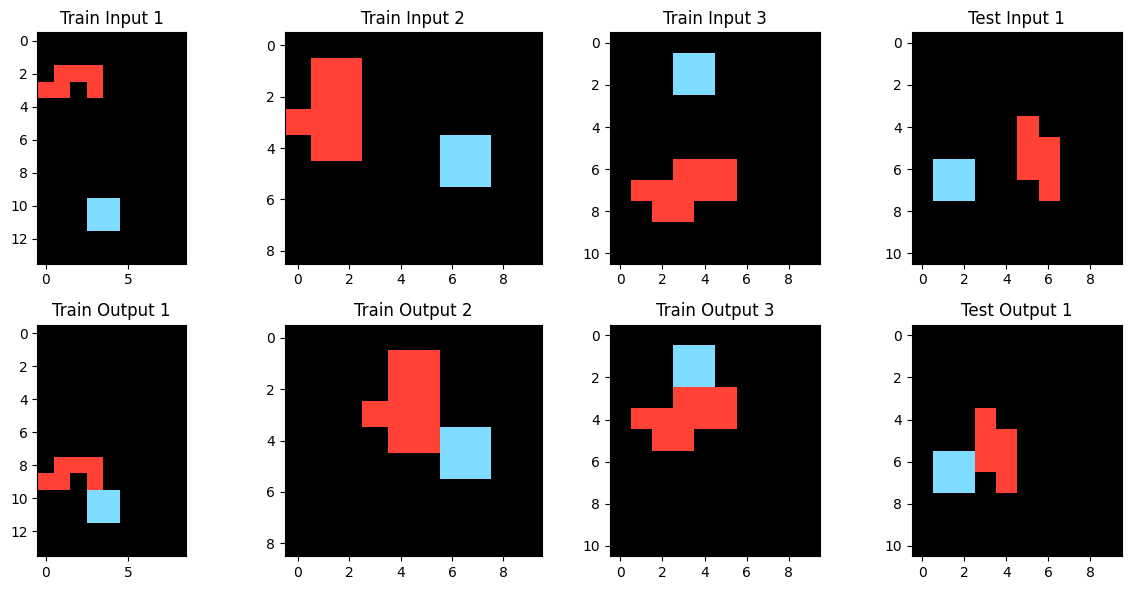

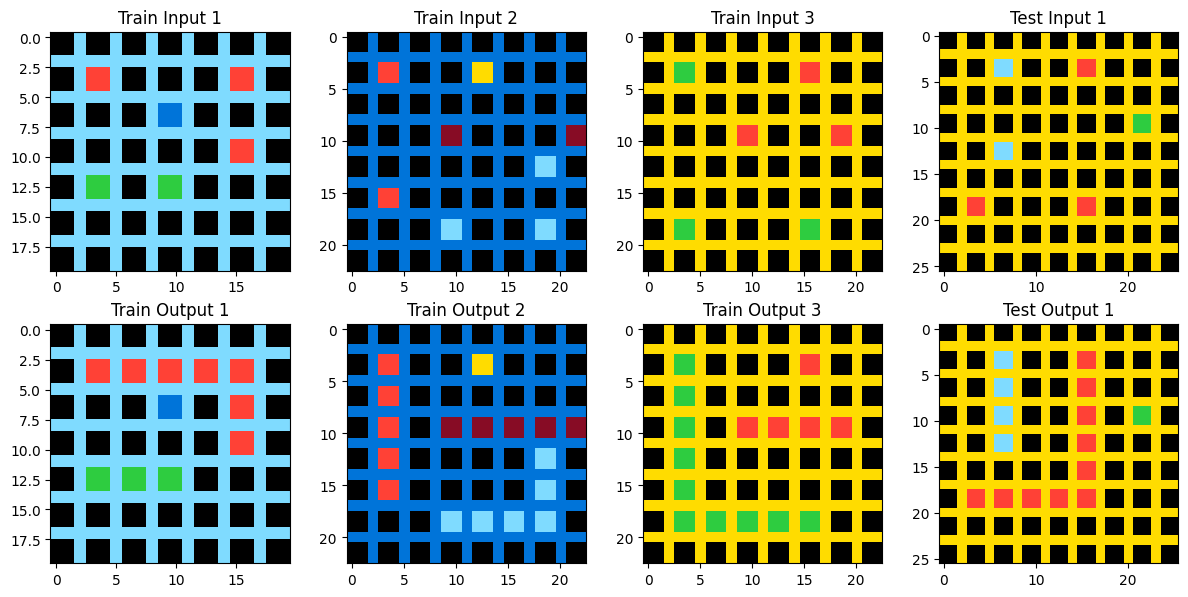

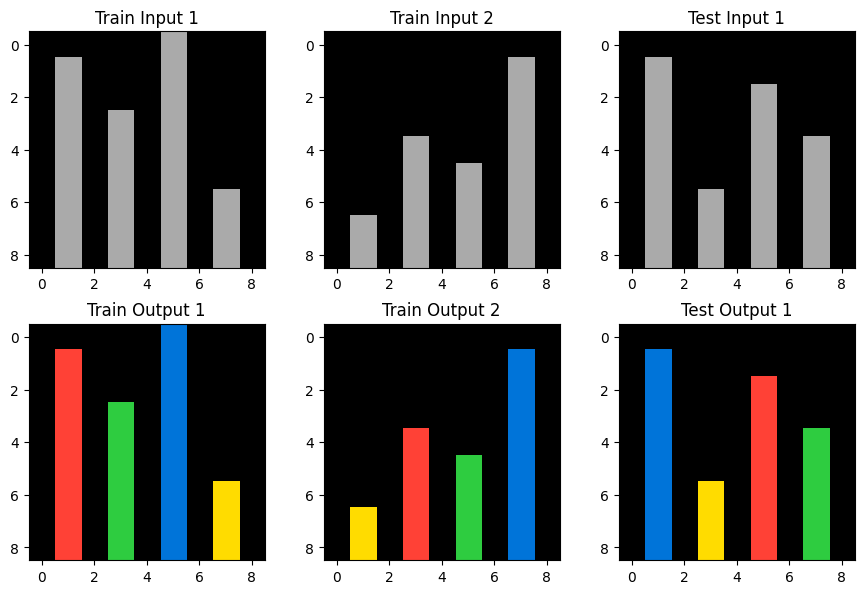

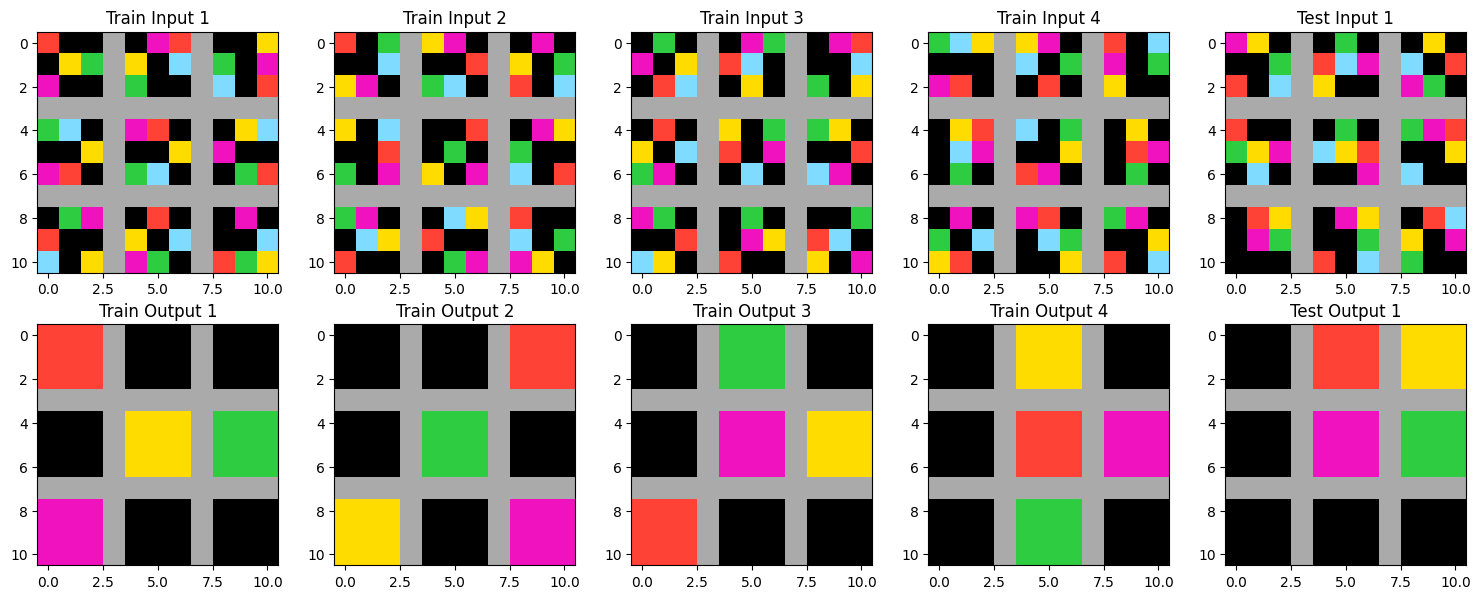

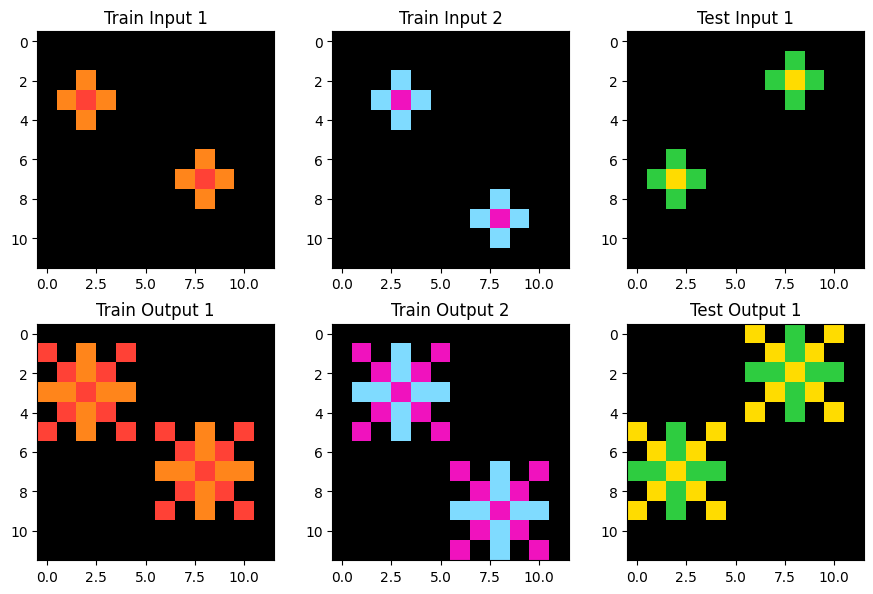

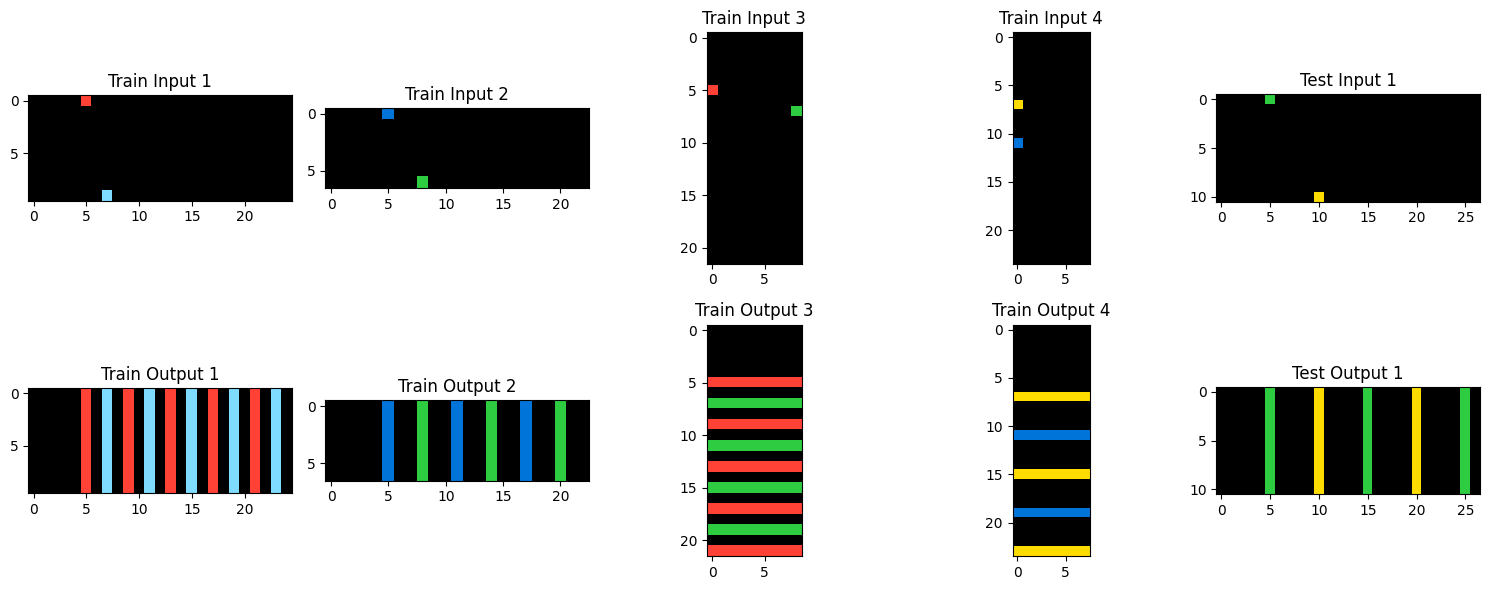

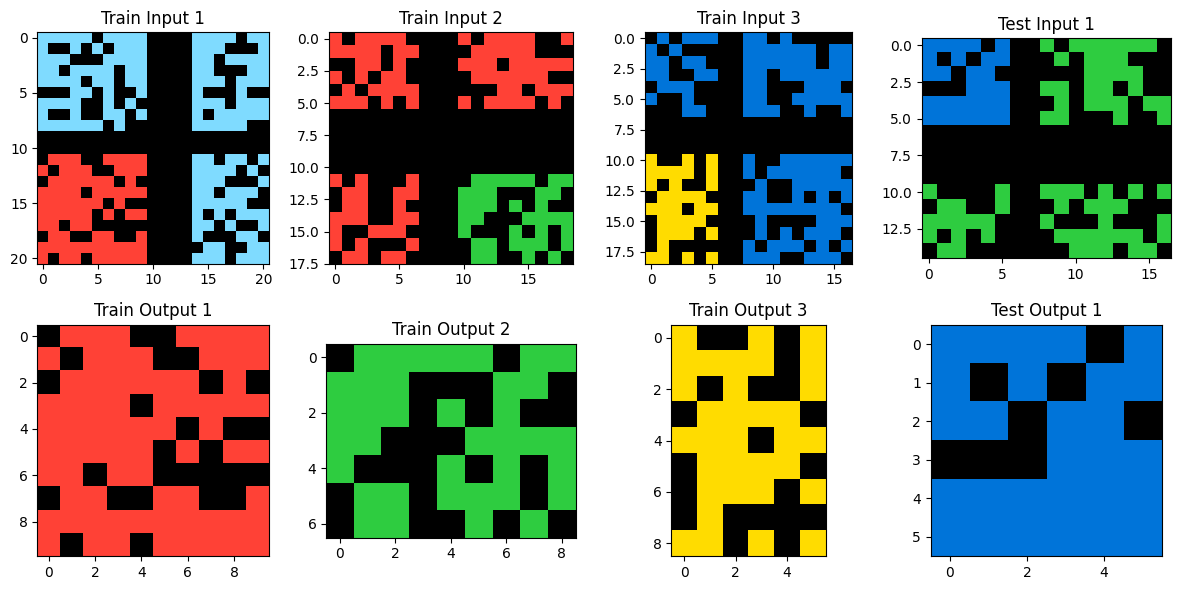

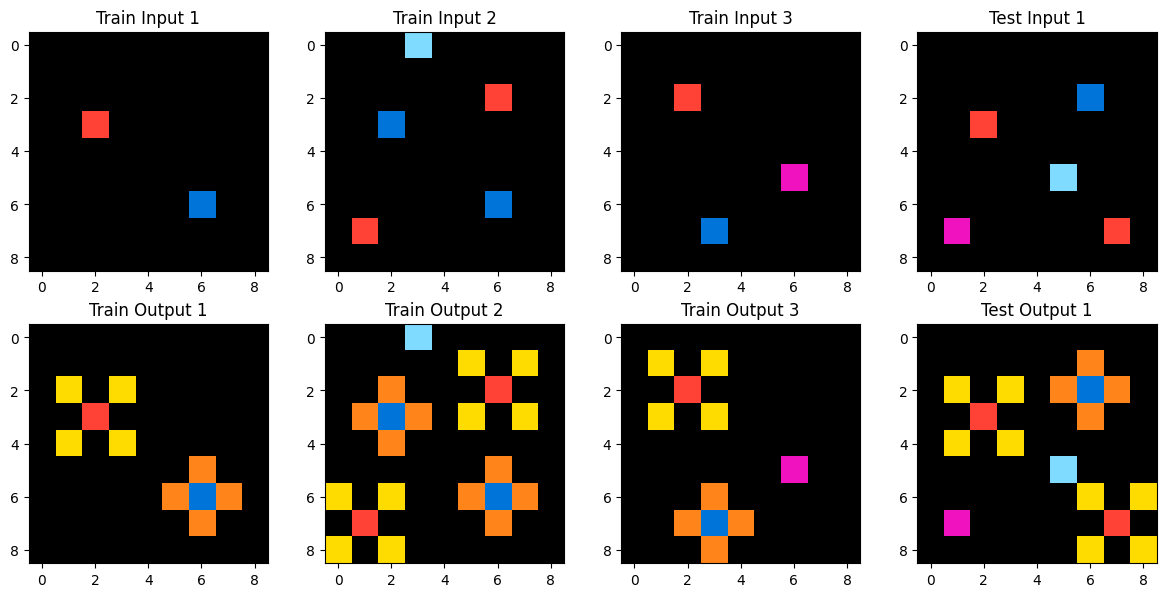

In [ ]:
# Visualize the padded task
for i in range(15):
    plot_task(tasks[i])

In [ ]:
X_train[0]

array([[0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import matplotlib.cm as cm

def grids_to_rgb(data, cmap, norm):
    # Normalize the data and apply the colormap
    scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)

    # Convert each grid into an RGB image
    num_samples = len(data)
    rgb_data = np.zeros((num_samples, 30, 30, 3), dtype=np.uint8)
    for i in range(num_samples):
        rgb_image = scalar_map.to_rgba(data[i][:,:], bytes=True)  # Convert to RGBA
        rgb_data[i] = rgb_image[:, :, :3]  # Drop the alpha channel
    return rgb_data

# Assuming X_train, Y_train, X_test, Y_test are already loaded and are lists of 30x30 arrays
X_train_rgb = grids_to_rgb(X_train, cmap, norm)
Y_train_rgb = grids_to_rgb(Y_train, cmap, norm)
X_test_rgb = grids_to_rgb(X_test, cmap, norm)
Y_test_rgb = grids_to_rgb(Y_test, cmap, norm)


In [ ]:
X_train_rgb[0]

array([[[  0,   0,   0],
        [255, 133,  27],
        [255, 133,  27],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 133,  27],
        [255, 133,  27],
        [255, 133,  27],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 133,  27],
        [255, 133,  27],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)

In [ ]:
Y_train_rgb[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
print("Shape of X_train_rgb (input):", X_train_rgb.shape)
print("Shape of Y_train_rgb  (output):", Y_train_rgb.shape)

Shape of X_train_rgb (input): (48, 30, 30, 3)
Shape of Y_train_rgb  (output): (48, 30, 30, 3)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

def create_pattern_learning_network(input_shape=(30, 30, 3), num_colors=10):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Convolutional layers for pattern learning
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)

    # Flatten for pattern relationship learning
    flatten_layer = Flatten()(x)

    # Pattern relationship branch
    pattern_branch = Dense(128, activation='relu')(flatten_layer)

    # Color learning branch
    color_branch = Dense(num_colors, activation='softmax')(flatten_layer)

    # Combine both branches
    combined_layer = Concatenate()([pattern_branch, color_branch])

    # Output layer
    output_layer = Dense(128, activation='relu')(combined_layer)

    # Model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create the Pattern Learning Network
pattern_learning_network = create_pattern_learning_network()

# Compile the model (you can adjust the optimizer and loss function as needed)
pattern_learning_network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Display the model summary
pattern_learning_network.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 30, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 32)           896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 30, 30, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 flatten (Flatten)           (None, 57600)                0         ['conv2d_1[0][0]']            
                                                                                              

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate, Attention
from tensorflow.keras.models import Model

def create_pattern_learning_network_with_attention(input_shape=(30, 30, 3), num_colors=10):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Convolutional layers for pattern learning
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)

    # Flatten for pattern relationship learning
    flatten_layer = Flatten()(x)

    # Pattern relationship branch
    pattern_branch = Dense(128, activation='relu')(flatten_layer)

    # Add attention mechanism
    attention = Attention()([flatten_layer, flatten_layer])  # Self-attention mechanism

    # Combine attention weights with pattern branch output
    combined_layer = Concatenate()([pattern_branch, attention])

    # Output layer
    output_layer = Dense(128, activation='relu')(combined_layer)

    # Model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create the Pattern Learning Network with Attention
pattern_learning_network_with_attention = create_pattern_learning_network_with_attention()

# Compile the model (you can adjust the optimizer and loss function as needed)
pattern_learning_network_with_attention.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Display the model summary
pattern_learning_network_with_attention.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 30, 30, 3)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 30, 30, 32)           896       ['input_2[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 64)           18496     ['conv2d_2[0][0]']            
                                                                                                  
 flatten_1 (Flatten)         (None, 57600)                0         ['conv2d_3[0][0]']            
                                                                                            

In [ ]:


# # # Create the pattern learning network
# # pattern_learning_network = create_pattern_learning_network()
# # pattern_learning_network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# # # Function to extract task parameters from the output of the pattern learning network
# # def get_task_parameters(pattern_output):
# #     # You need to modify this function to extract task parameters from the output of the pattern learning network
# #     # For example, you can extract the colors used in the task based on the output
# #     pass

# # # Generate pattern output using the pattern learning network
# # pattern_output = pattern_learning_network.predict(X_train_rgb)

# # # Get task-specific features for each task based on the pattern output
# # def generate_augmentations(patterns, num_augmentations=120):
# #     datagen = ImageDataGenerator(
# #         rotation_range=10,
# #         width_shift_range=0.1,
# #         height_shift_range=0.1,
# #         shear_range=0.1,
# #         zoom_range=0.1,
# #         horizontal_flip=True,
# #         vertical_flip=True,
# #         fill_mode='nearest'
# #     )
# #     augmented_data = []
# #     for pattern in patterns:
# #         for X_batch in datagen.flow(np.expand_dims(pattern, axis=0), batch_size=1):
# #             augmented_data.append(X_batch.squeeze())
# #             if len(augmented_data) >= num_augmentations:
# #                 break
# #     return np.array(augmented_data)


# import numpy as np
# from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate, Attention
# from tensorflow.keras.models import Model

# def create_pattern_learning_network_with_attention(input_shape=(30, 30, 3), num_colors=10):
#     input_layer = Input(shape=input_shape)
#     x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
#     x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
#     x = Flatten()(x)
#     x = Dense(128, activation='relu')(x)
#     attention_output = Attention()([x, x])  # Apply attention mechanism
#     pattern_branch = Dense(128, activation='relu')(attention_output)
#     color_branch = Dense(num_colors, activation='softmax')(attention_output)
#     combined_layer = Concatenate()([pattern_branch, color_branch])
#     output_layer = Dense(128, activation='relu')(combined_layer)
#     model = Model(inputs=input_layer, outputs=output_layer)
#     return model

# def get_task_parameters(pattern_output):
#     # Assuming pattern_output is a numpy array with the output of the pattern learning network with attention

#     # Example: Extracting task parameters based on attention mechanism
#     # Here, we assume that the attention mechanism highlights important features in the pattern output

#     # 1. Identify the attention weights from the pattern output
#     attention_weights = pattern_output[:, :30]  # Assuming the attention weights are the first 30 values in the output

#     # 2. Process the attention weights to determine the importance of different regions in the pattern
#     # For example, you could find the maximum attention weight and its corresponding position
#     max_attention_weight = np.max(attention_weights)
#     max_attention_position = np.argmax(attention_weights)

#     # 3. Use the extracted information to derive task parameters
#     # For instance, if the task involves identifying a specific pattern or color, you could use the attention weights
#     # to determine which regions of the input are most relevant to the task

#     # Example: Return task parameters
#     task_parameters = {
#         'max_attention_weight': max_attention_weight,
#         'max_attention_position': max_attention_position
#         # Add more task parameters as needed
#     }

#     return task_parameters

# # Create the Pattern Learning Network with attention
# pattern_learning_network_with_attention = create_pattern_learning_network_with_attention()

# # Compile the model
# pattern_learning_network_with_attention.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# # Display the model summary
# pattern_learning_network_with_attention.summary()



In [ ]:
import numpy as np
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
data_path = Path('/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC')
training_path = data_path / 'training'

# Load ARC task from JSON file
def load_arc_task(filename):
    with open(filename, 'r') as file:
        task = json.load(file)
    return task

# Pad the input array to the target size with zeros
def pad_array(array, target_size=(40, 40)):
    padded_array = np.zeros(target_size, dtype=int)
    height, width = array.shape
    padded_array[:height, :width] = array
    return padded_array

# Load the first 15 tasks from the training folder
tasks = []
for task_file in sorted(training_path.glob('*.json'))[:15]:
    task = load_arc_task(task_file)
    tasks.append(task)

# Pad each array in each task to 40x40 size and store them in NumPy arrays
X_train, Y_train = [], []
for task in tasks:
    for example in task['train']:
        X_train.append(pad_array(np.array(example['input']), target_size=(30,30)))
        Y_train.append(pad_array(np.array(example['output']), target_size=(30,30)))

X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Function to generate augmentations
def generate_augmentations(patterns, num_augmentations=120):
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )
    augmented_data = []
    for pattern in patterns:
        for X_batch in datagen.flow(np.expand_dims(pattern, axis=0), batch_size=1):
            augmented_data.append(X_batch.squeeze())
            if len(augmented_data) >= num_augmentations:
                break
    return np.array(augmented_data)

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model

def create_pattern_learning_network(input_shape=(30, 30, 3), num_colors=10):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Convolutional layers for pattern learning
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)

    # Flatten for pattern relationship learning
    flatten_layer = Flatten()(x)

    # Pattern relationship branch
    pattern_branch = Dense(128, activation='relu')(flatten_layer)

    # Color learning branch
    color_branch = Dense(num_colors, activation='softmax')(flatten_layer)

    # Combine both branches
    combined_layer = Concatenate()([pattern_branch, color_branch])

    # Output layer
    output_layer = Dense(30 * 30, activation='sigmoid')(combined_layer)  # Output shape matches ground truth

    # Reshape the output to match ground truth shape
    output_layer = Reshape((30, 30))(output_layer)

    # Model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create the Pattern Learning Network
pattern_learning_network = create_pattern_learning_network()

# Compile the model
pattern_learning_network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Display the model summary
pattern_learning_network.summary()


# # Create the first neural network
# def create_pattern_learning_network(input_shape=(30, 30, 3), num_colors=10):
#     input_layer = Input(shape=input_shape)
#     x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
#     x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
#     flatten_layer = Flatten()(x)
#     pattern_branch = Dense(128, activation='relu')(flatten_layer)
#     color_branch = Dense(num_colors, activation='softmax')(flatten_layer)
#     combined_layer = Concatenate()([pattern_branch, color_branch])
#     output_layer = Dense(128, activation='relu')(combined_layer)
#     model = Model(inputs=input_layer, outputs=output_layer)
#     return model

# Create the second neural network
def create_augmentation_network(input_shape=(30, 30, 3), task_specific_features_size=56):
    task_input = Input(shape=(task_specific_features_size,))
    pattern_learning_output = Input(shape=(128,))
    combined_input = Concatenate()([pattern_learning_output, task_input])
    output_layer = Dense(128, activation='relu')(combined_input)
    model = Model(inputs=[pattern_learning_output, task_input], outputs=output_layer)
    return model

# Define the feature extractor
def create_feature_extractor(input_shape=(30, 30, 3)):
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    flatten_layer = Flatten()(x)
    output_layer = Dense(56, activation='relu')(flatten_layer)  # Assuming task-specific features size is 56
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Load and compile the first neural network
pattern_learning_network = create_pattern_learning_network()
pattern_learning_network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Reshape the input data to add the color channel dimension
X_train = X_train.reshape(-1, 30, 30, 1)

# Repeat the single channel three times to match the expected input shape with 3 channels
X_train = np.repeat(X_train, 3, axis=-1)


# Train the first neural network
pattern_learning_network.fit(X_train, Y_train, epochs=10, batch_size=4)

# Get task-specific features
features = []
for task in tasks:
    features.append(get_task_parameters(task))  # You need to implement this function

# Generate augmentations for each task in the dataset
for task_features, task_patterns in zip(features, X_train):
    augmentations = generate_augmentations([task_patterns], num_augmentations=120)
    # Train the second network using the augmentations and task-specific features
    # Define the training data for the second network

# Create the second network
augmentation_network = create_augmentation_network()

# Compile the second network
augmentation_network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Display the model summary
augmentation_network.summary()

# Now, you can use the trained networks for prediction and further tasks


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30, 30, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 30, 30, 32)           896       ['input_3[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 30, 30, 64)           18496     ['conv2d_4[0][0]']            
                                                                                                  
 flatten_2 (Flatten)         (None, 57600)                0         ['conv2d_5[0][0]']            
                                                                                            

NameError: name 'get_task_parameters' is not defined

Certainly! In the provided code, augmentation is performed using the generate_augmentations function. Let's break down how augmentation is done step by step:

ImageDataGenerator Configuration: The ImageDataGenerator class from tensorflow.keras.preprocessing.image module is used to generate augmented images. Various augmentation parameters are configured in the datagen object, such as:
rotation_range: Degree range for random rotations.
width_shift_range and height_shift_range: Ranges for randomly translating the width and height of images.
shear_range: Shear intensity (angle in degrees) for shear transformation.
zoom_range: Range for random zoom.
horizontal_flip and vertical_flip: Booleans indicating whether to randomly flip images horizontally or vertically.
fill_mode: Strategy for filling in newly created pixels.
Augmentation Generation Loop: The generate_augmentations function takes a set of input patterns (images) and generates augmented versions of those patterns. It iterates over each pattern in the input and generates augmented versions using the datagen.flow method.
Appending Augmented Data: The augmented versions of patterns are stored in the augmented_data list. For each pattern, the datagen.flow method generates multiple augmented versions based on the specified augmentation parameters. These augmented versions are then appended to the augmented_data list until the desired number of augmentations (num_augmentations) is reached.
Return Augmented Data: Finally, the function returns the augmented data as a NumPy array.
Here's a summary of the process:

For each input pattern:
Augment the pattern using the configured augmentation parameters.
Append the augmented versions to the augmented_data list.
Return the augmented data as a NumPy array.
This approach allows you to generate augmented versions of input patterns, which can be useful for increasing the diversity of training data and improving the generalization ability of machine learning models.








In [ ]:
# import matplotlib.pyplot as plt

# # Define a function to plot grid images
# def plot_grid_images(images, num_images=5):
#     fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
#     for i in range(num_images):
#         axes[i].imshow(images[i], cmap='gray')  # Assuming grayscale images
#         axes[i].axis('off')
#     plt.show()

# # Plot the augmented data
# plot_grid_images(augmentations)

import matplotlib.pyplot as plt

# Define a function to plot grid images with a specified colormap
def plot_grid_images(images, num_images=20, cmap='viridis'):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap=cmap)
        axes[i].axis('off')
    plt.show()

# Plot the augmented data with the specified colormap
plot_grid_images(augmentations, cmap=cmap)

